# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала.

<!--
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

.wav файл состоит из чанок

| Чанк     | Размер | Описание                                       |
|----------|--------|------------------------------------------------|
| "RIFF"   | Размер | Указывает, что файл относится к формату RIFF   |
| "WAVE"   |        | Идентификатор формата WAVE                     |
| "fmt "   | Размер | Параметры аудио (частота дискретизации, каналы и т.д.) |
| "data"   | Размер | Аудиоданные                                    |
| Другие чанки (опционально) |        | Дополнительные данные или метаданные (например, информация о треке) |




Чанки можно разделить на заголовок и данные. Заголовок занимает первые 44 байта (или больше) и содержит много параметров, некоторыми из которых являются:


*   sampleRate - частота дискретизации
*   numChannels - количество каналов
*   bitsPerSample - глубина квантования
*   byteRate - кол-во байт для воспроизведения одно1 секунды аудио

После этого идет чанк data, непосредственно с даннымми аудиозаписи

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [ ]:
!wget https://github.com/Uberwald/digital-signal-processing/blob/Homework_1/My_voice.wav?raw=true -O My_voice.wav

--2024-10-06 21:31:58--  https://github.com/Uberwald/digital-signal-processing/blob/Homework_1/My_voice.wav?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Uberwald/digital-signal-processing/raw/refs/heads/Homework_1/My_voice.wav [following]
--2024-10-06 21:31:58--  https://github.com/Uberwald/digital-signal-processing/raw/refs/heads/Homework_1/My_voice.wav
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Uberwald/digital-signal-processing/refs/heads/Homework_1/My_voice.wav [following]
--2024-10-06 21:31:59--  https://raw.githubusercontent.com/Uberwald/digital-signal-processing/refs/heads/Homework_1/My_voice.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Conn

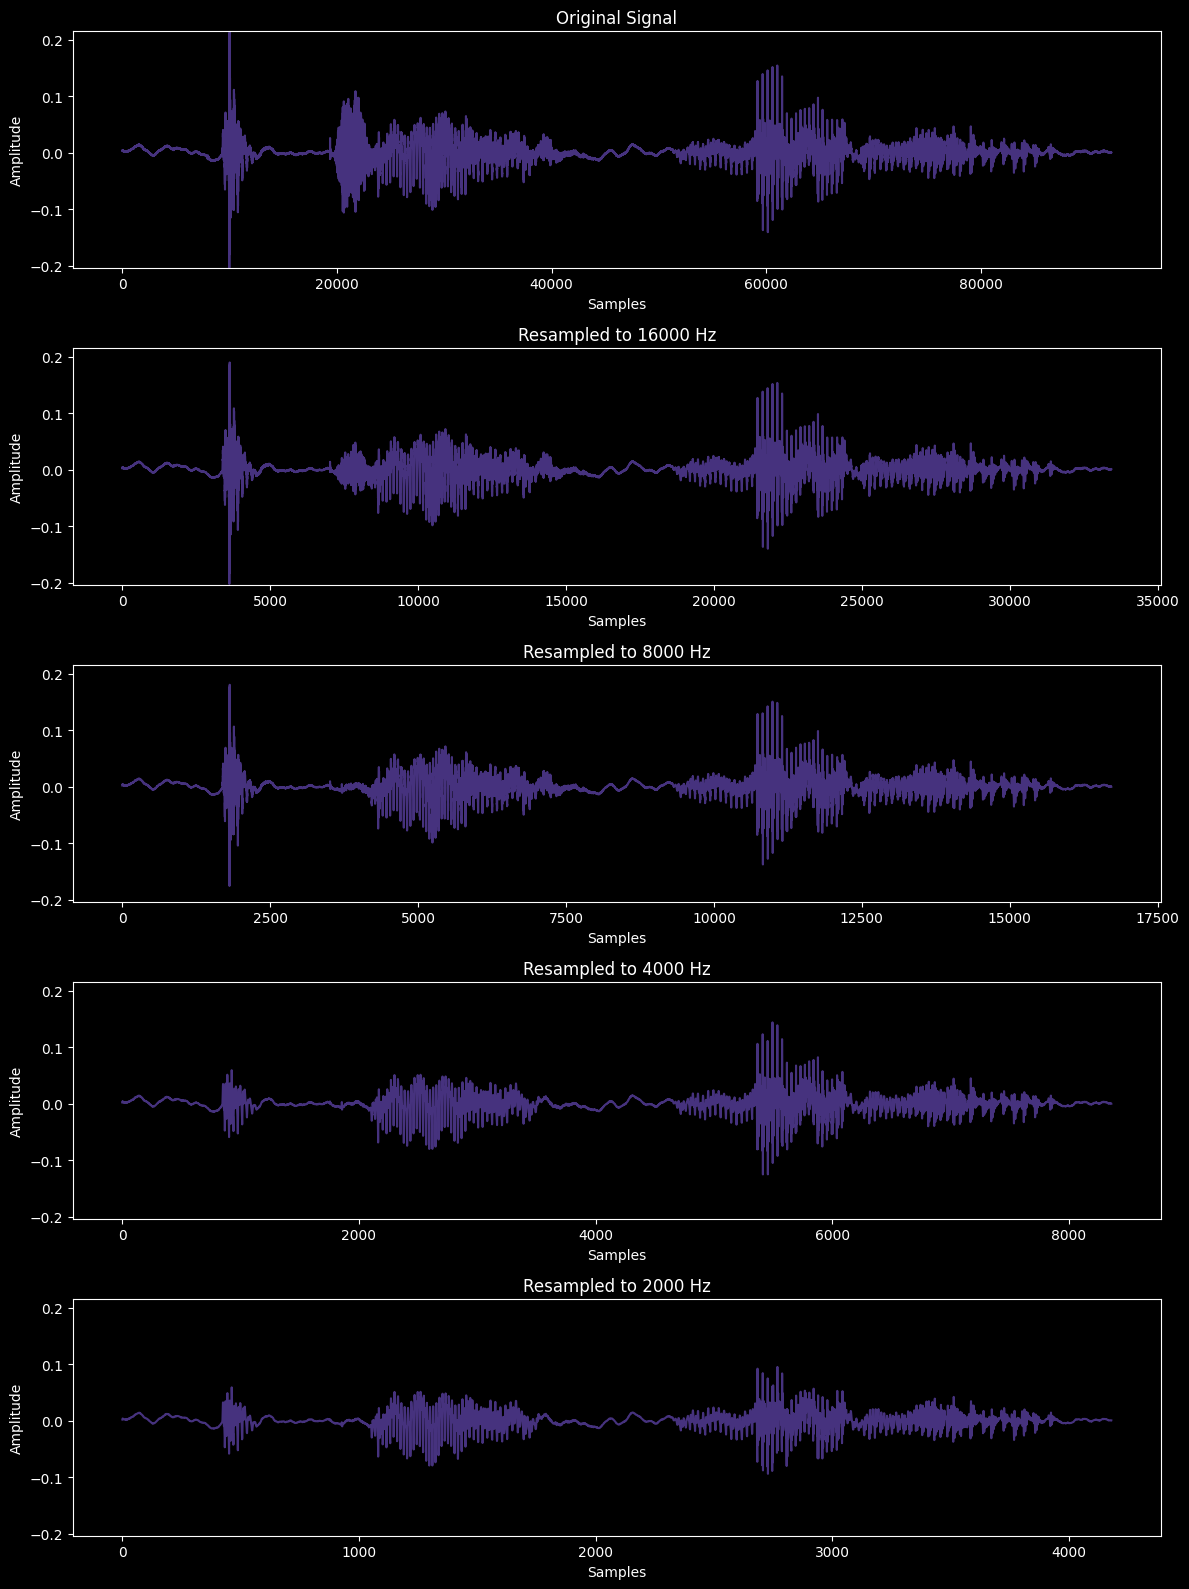

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import IPython.display as ipd
import seaborn as sns

file_path = '/content/My_voice.wav'
y, sr = librosa.load(file_path, sr=None)

new_sr_1 = 2000
new_sr_2 = 4000
new_sr_3 = 8000
new_sr_4 = 16000

y_resampled_1 = librosa.resample(y, orig_sr=sr, target_sr=new_sr_1)
y_resampled_2 = librosa.resample(y, orig_sr=sr, target_sr=new_sr_2)
y_resampled_3 = librosa.resample(y, orig_sr=sr, target_sr=new_sr_3)
y_resampled_4 = librosa.resample(y, orig_sr=sr, target_sr=new_sr_4)

y_min = np.min(y)
y_max = np.max(y)

plt.figure(figsize=(12, 16))
plt.style.use('dark_background')
sns.set_palette('viridis')

plt.subplot(5, 1, 1)
plt.title('Original Signal')
plt.plot(y)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.ylim([y_min, y_max])

plt.subplot(5, 1, 2)
plt.title('Resampled to 16000 Hz')
plt.plot(y_resampled_4)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.ylim([y_min, y_max])

plt.subplot(5, 1, 3)
plt.title('Resampled to 8000 Hz')
plt.plot(y_resampled_3)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.ylim([y_min, y_max])


plt.subplot(5, 1, 4)
plt.title('Resampled to 4000 Hz')
plt.plot(y_resampled_2)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.ylim([y_min, y_max])

plt.subplot(5, 1, 5)
plt.title('Resampled to 2000 Hz')
plt.plot(y_resampled_1)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.ylim([y_min, y_max])

plt.tight_layout()
plt.show()

In [ ]:
print("Оригинальный сигнал (44.1 кГц):")
ipd.Audio(file_path)

Оригинальный сигнал (44.1 кГц):


In [ ]:
# Очень сложно разобрать
print("Сигнал с частотой 2000 Гц:")
ipd.Audio(y_resampled_1, rate=new_sr_1)

Сигнал с частотой 2000 Гц:


In [ ]:
print("Сигнал с частотой 4000 Гц:")
ipd.Audio(y_resampled_2, rate=new_sr_2)

Сигнал с частотой 4000 Гц:


In [ ]:
print("Сигнал с частотой 8000 Гц:")
ipd.Audio(y_resampled_3, rate=new_sr_3)

Сигнал с частотой 8000 Гц:


In [ ]:
print("Сигнал с частотой 16000 Гц:")
ipd.Audio(y_resampled_4, rate=new_sr_4)

Сигнал с частотой 16000 Гц:


### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

WAV - это формат аудиоданных без сжатия, поэтому они занимают довольно много памяти

MP3 - это формат аудиоданных со значительным сжатием, уменьшается битрейт, обрезается часть частот

Ogg - ещё один формат данных со сжатием, однако он использует более продвинутые алгоритмы, потому позволяет не так сильно изменить оригинальное звучание, при объёме памяти близким к MP3

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону.

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время.


In [ ]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10,
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k',
        linewidth = 1)
    plt.grid(which='minor',
        color = 'k',
        linestyle = ':')
    plt.show()

In [ ]:
import requests
import pickle

response = requests.get("https://github.com/itmo-mbss-lab/dsp_labs_book/raw/main/resources/data.pickle")

with open("data.pickle", "wb") as f:
    f.write(response.content)

with open("data.pickle", "rb") as f:
    test_data = pickle.load(f)

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

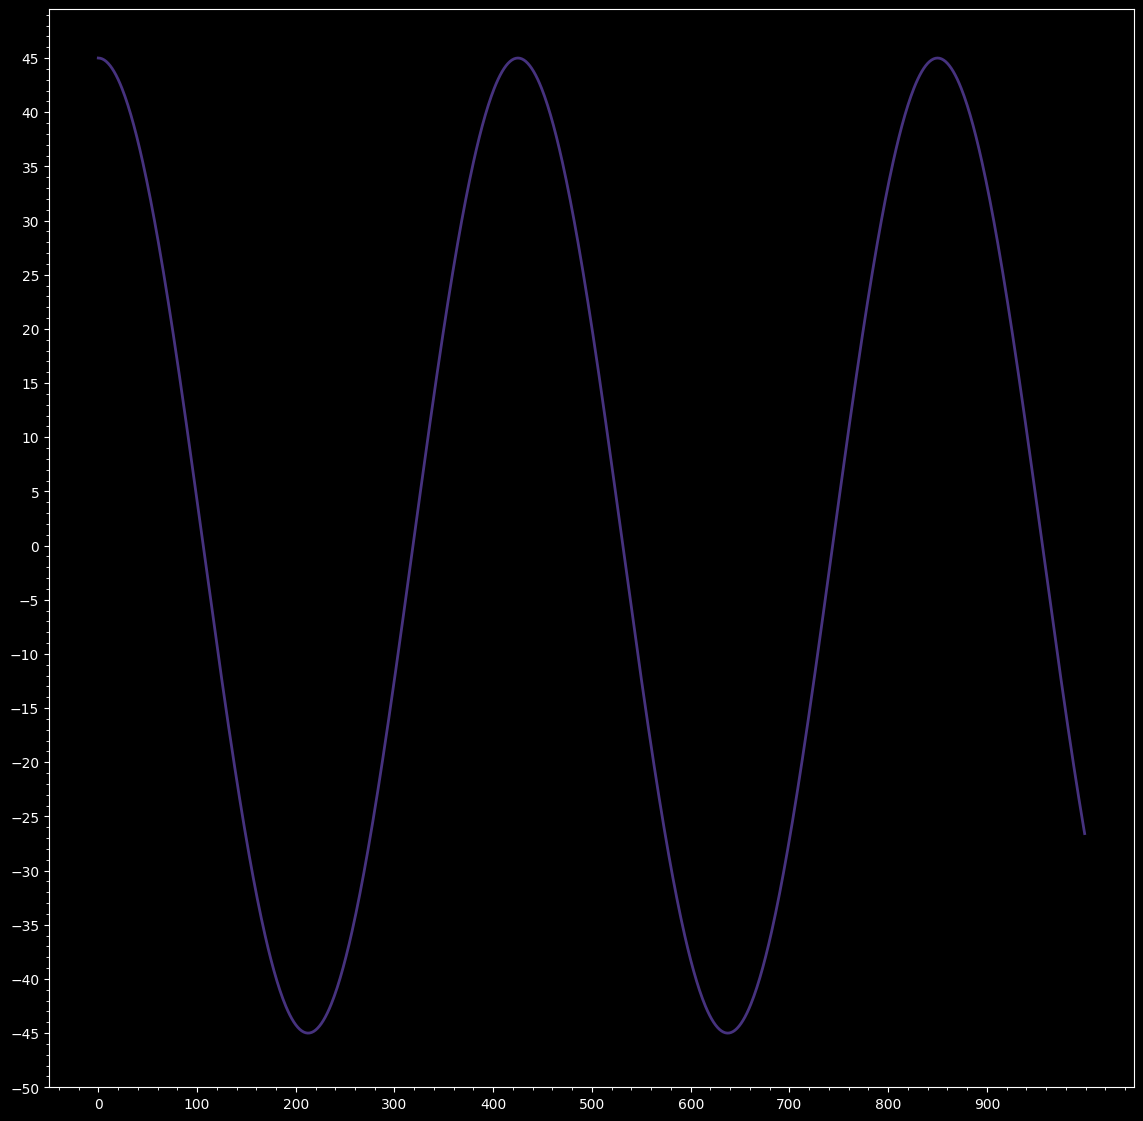

In [ ]:
draw_signal(test_data['task2']['a'])

In [ ]:
amplitude = 45
frequency = 2.35
phase = 0

omega = 2 * np.pi * frequency
t = np.arange(1000)

a = amplitude * np.cos(omega * t / 1000 + phase)

In [ ]:
omega

14.765485471872028

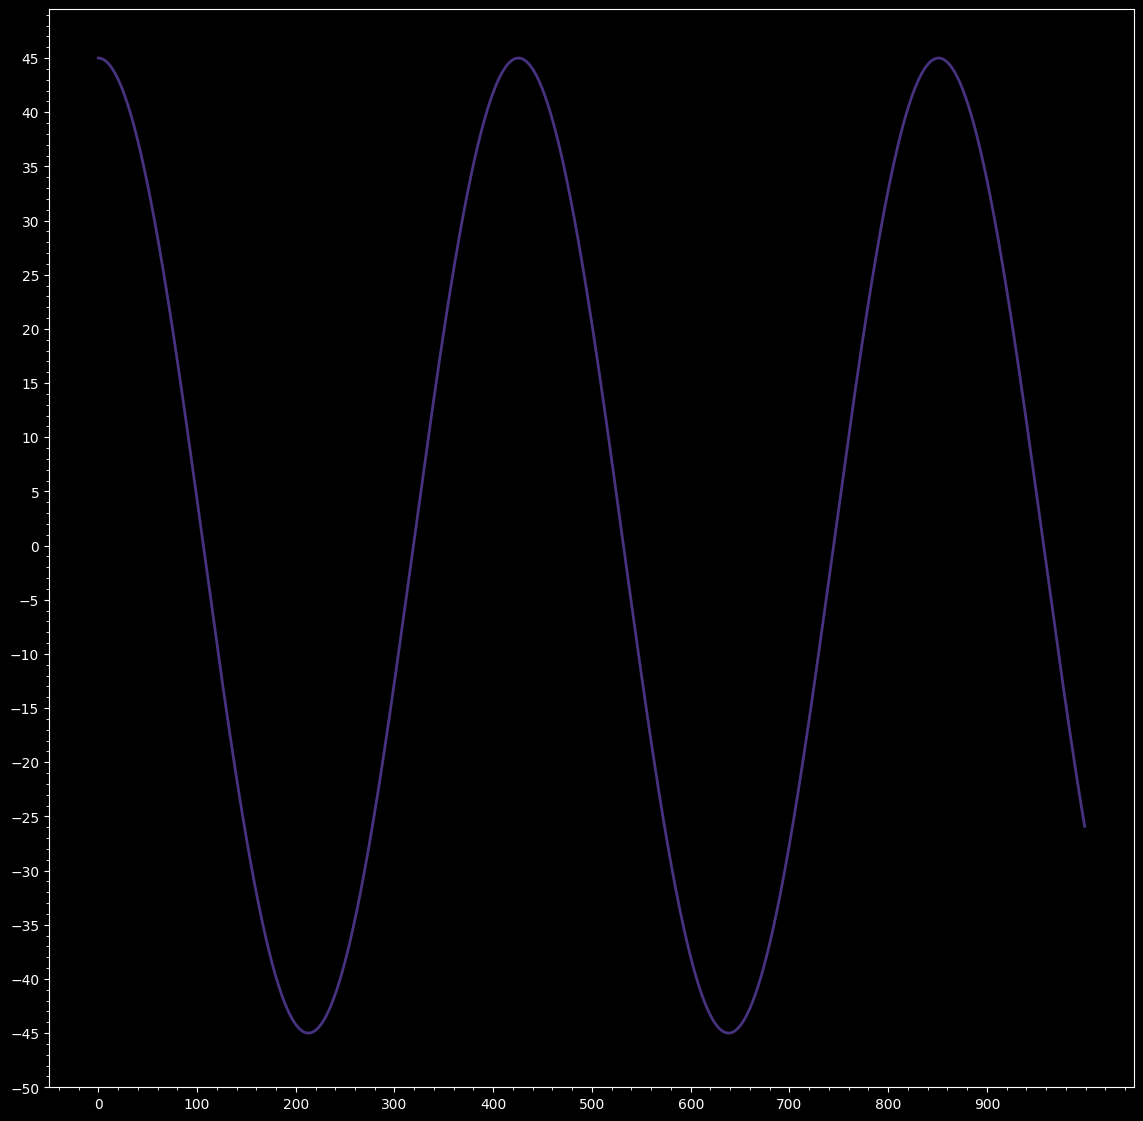

In [ ]:
draw_signal(a)

In [ ]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $ 45

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $ 14.7654

3. Фаза - $\phi= $ 0

### Сигнал ***b***

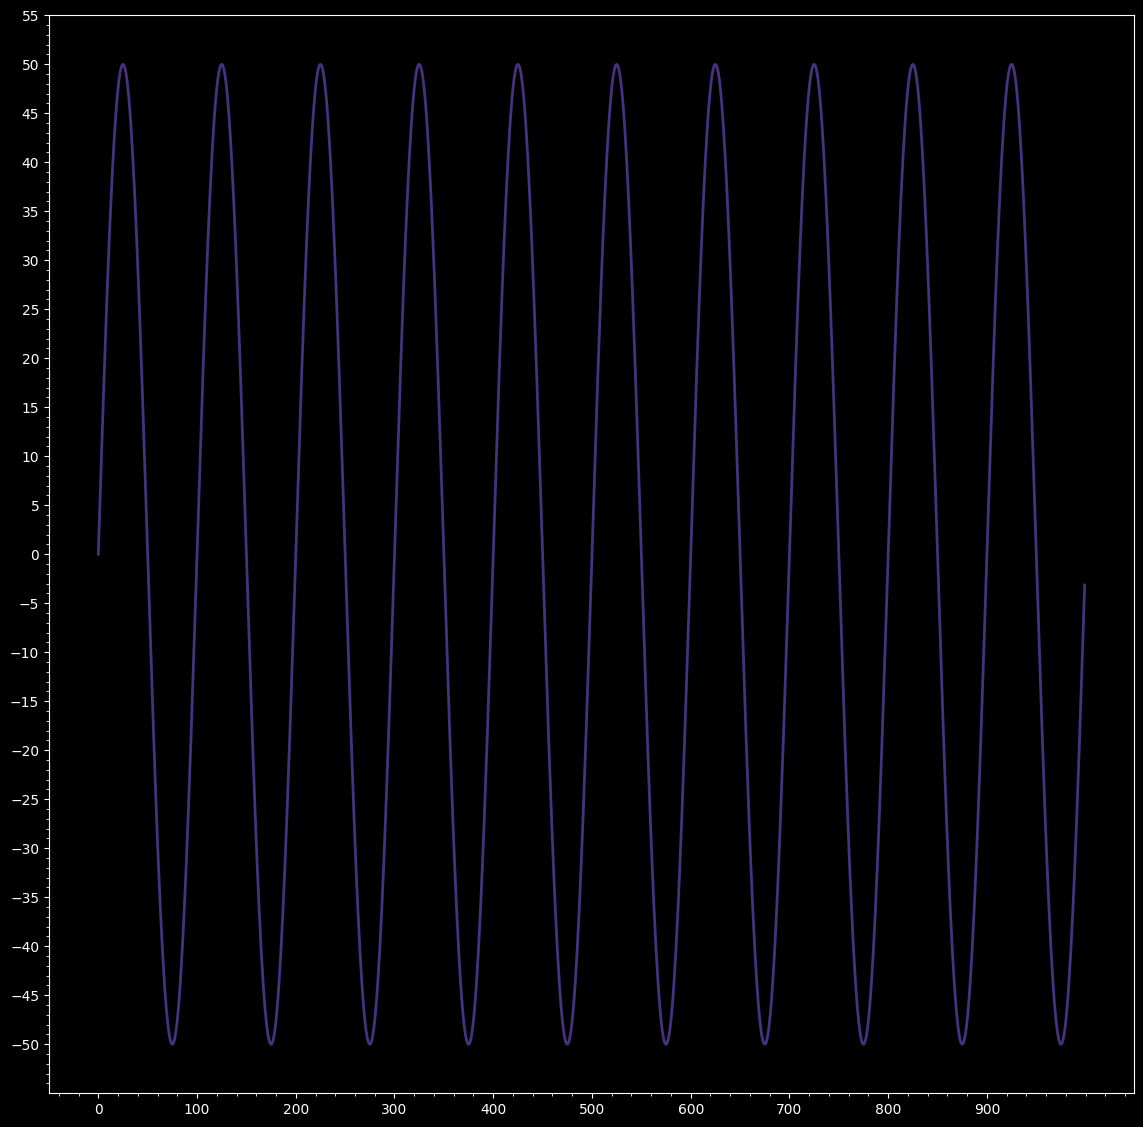

In [ ]:
draw_signal(test_data['task2']['b'])

In [ ]:
amplitude = 50
frequency = 10
phase = 3*np.pi / 2

omega = 2 * np.pi * frequency
t = np.arange(1000)

b = amplitude * np.cos(omega * t / 1000 + phase)

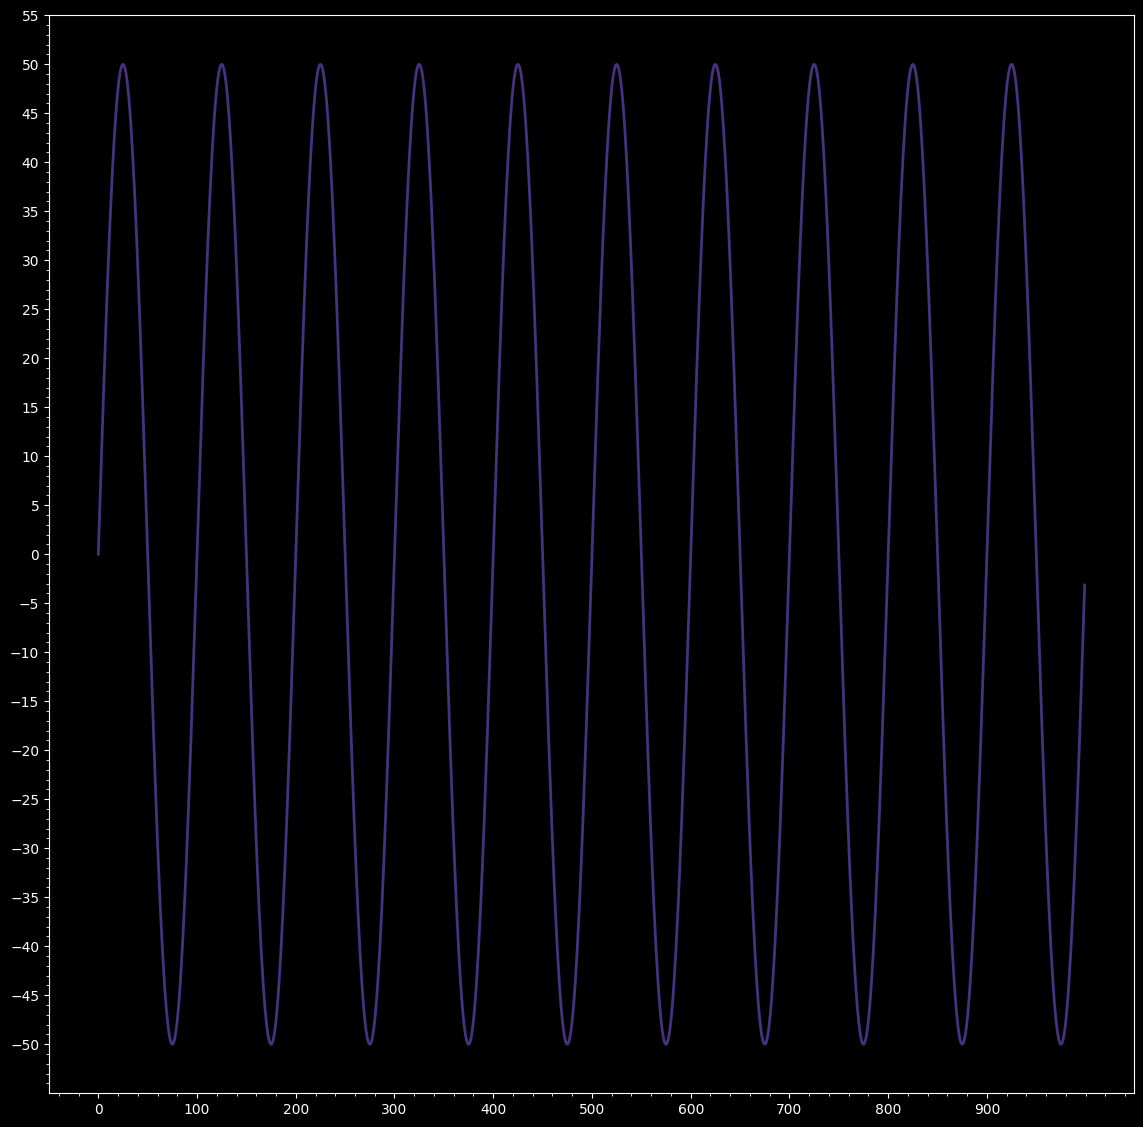

In [ ]:
draw_signal(b)

In [ ]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


In [ ]:
omega

62.83185307179586

**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $ 50

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $ 62.8318

3.  Фаза - $\phi= $ $ \displaystyle\ \frac{3\pi}{T} $

### Сигнал ***c***

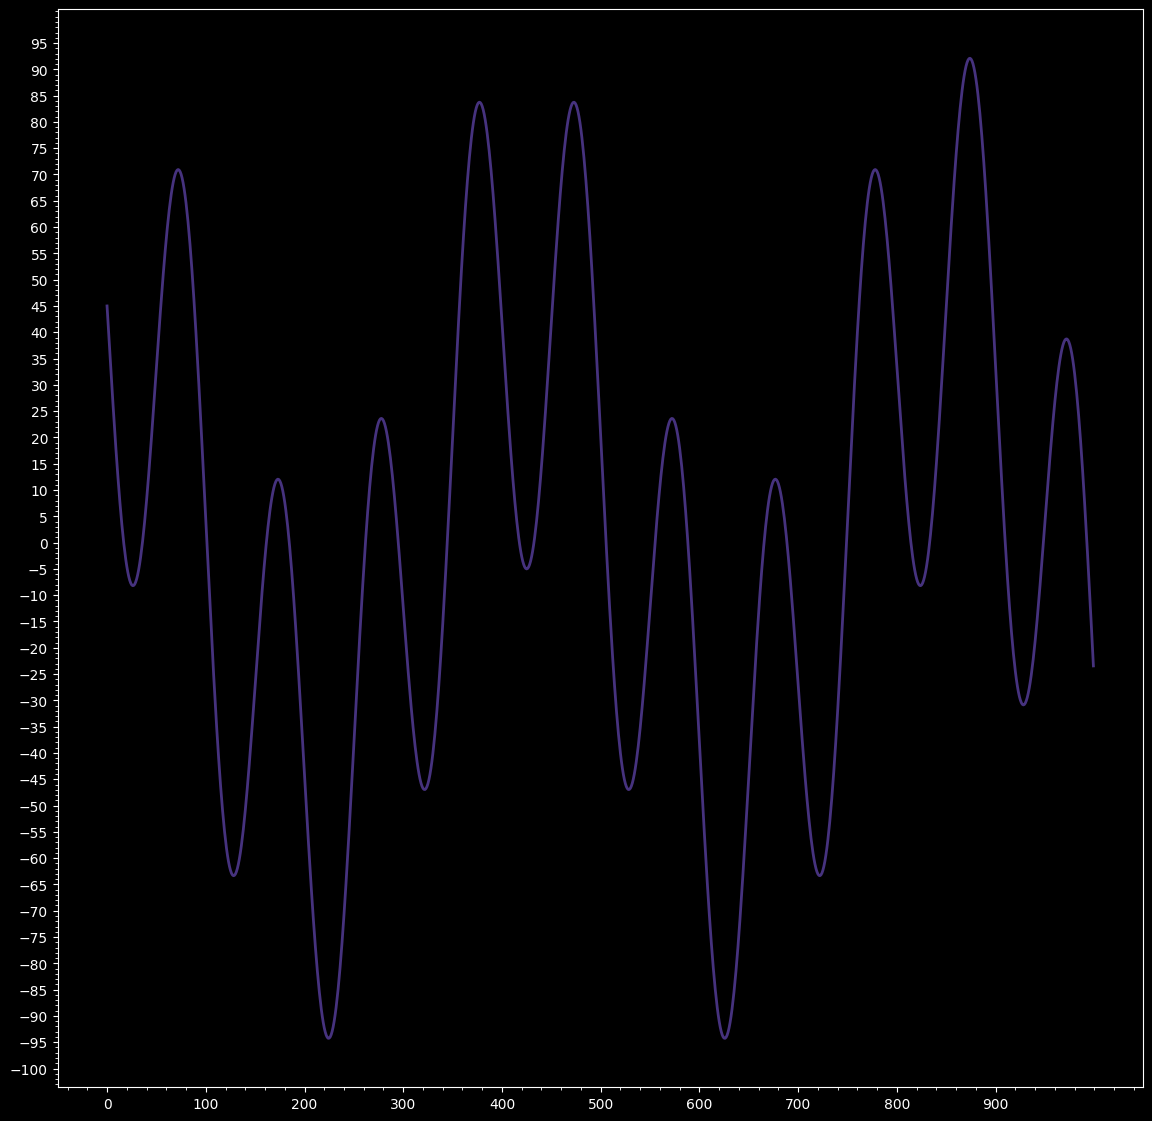

In [ ]:
draw_signal(test_data['task2']['c'])

In [ ]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
c = a - b

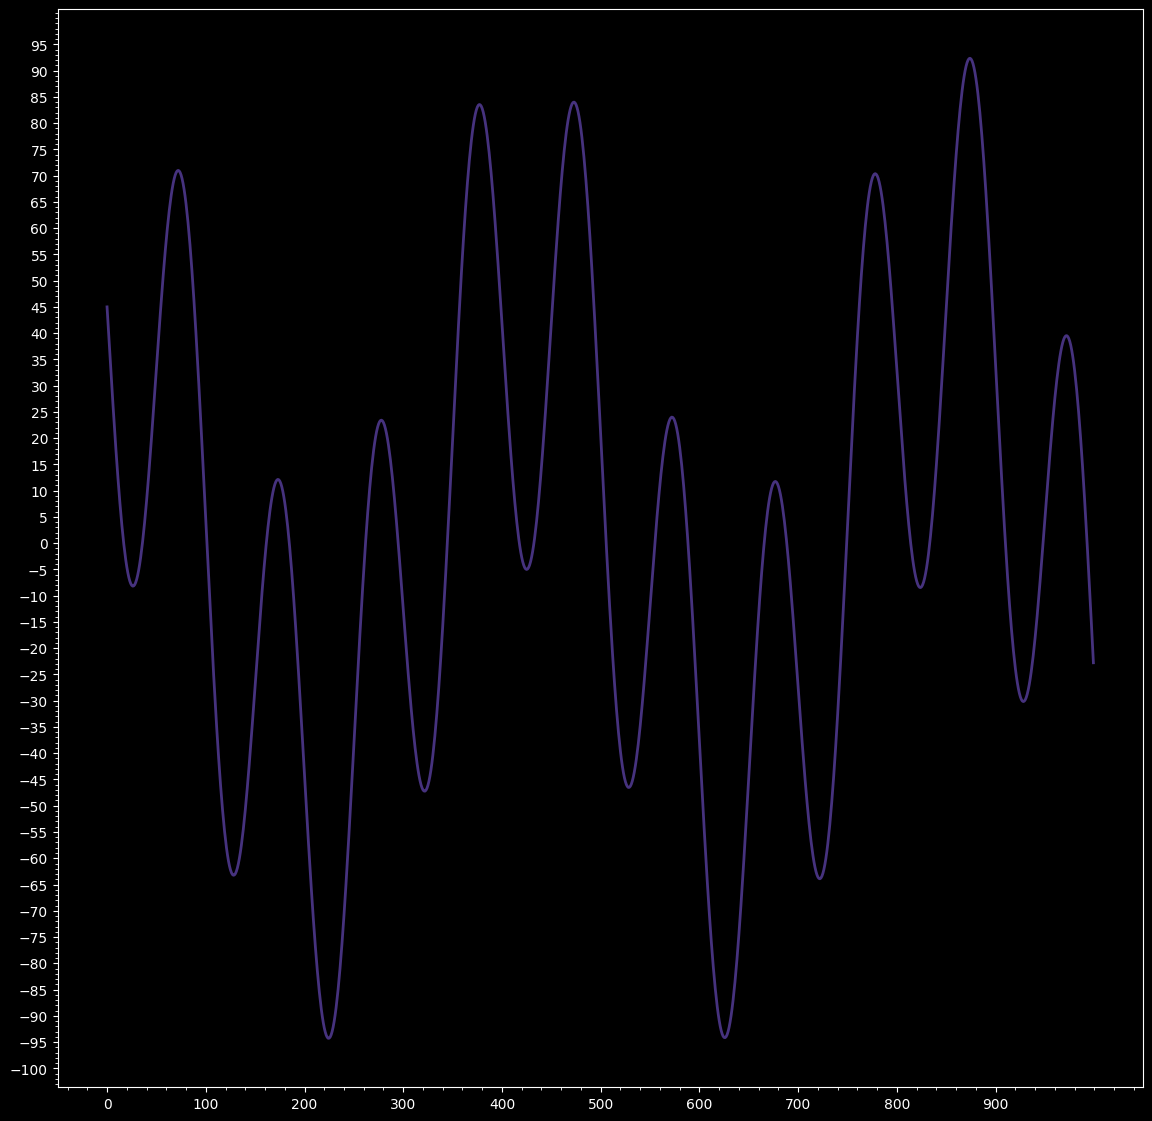

In [ ]:
draw_signal(c)

In [ ]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def convolve(x, h):
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)

    # Процесс свёртки
    for n in range(N + M - 1):
        for m in range(M):
            if 0 <= n - m < N:
                y[n] += x[n - m] * h[m]

    return y

In [ ]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [ ]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [ ]:
res = convolve(a,b)

In [ ]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

In [48]:
import seaborn as sns
plt.style.use('dark_background')
sns.set_palette('viridis')

Сигнал **а**

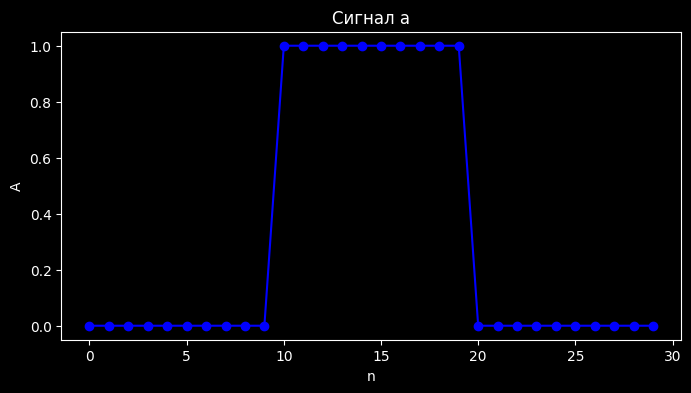

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(a, marker='o', linestyle='-', color='b')
plt.title('Сигнал a')
plt.xlabel('n')
plt.ylabel('А')
plt.show()

Сигнал **b**

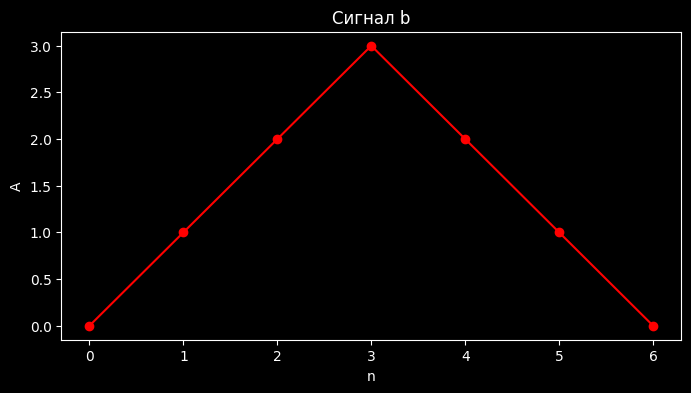

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(b, marker='o', linestyle='-', color='r')
plt.title('Сигнал b')
plt.xlabel('n')
plt.ylabel('А')
plt.show()

Свертка **a** и **b**

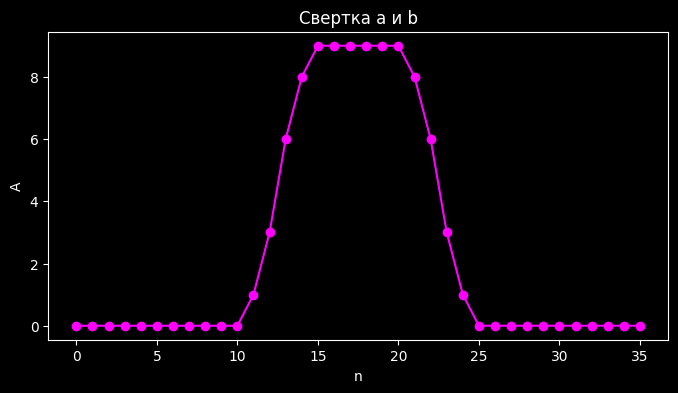

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(res, marker='o', linestyle='-', color='#FF00FF')
plt.title('Свертка a и b')
plt.xlabel('n')
plt.ylabel('А')
plt.show()

Все 3 графика на одной картинке:

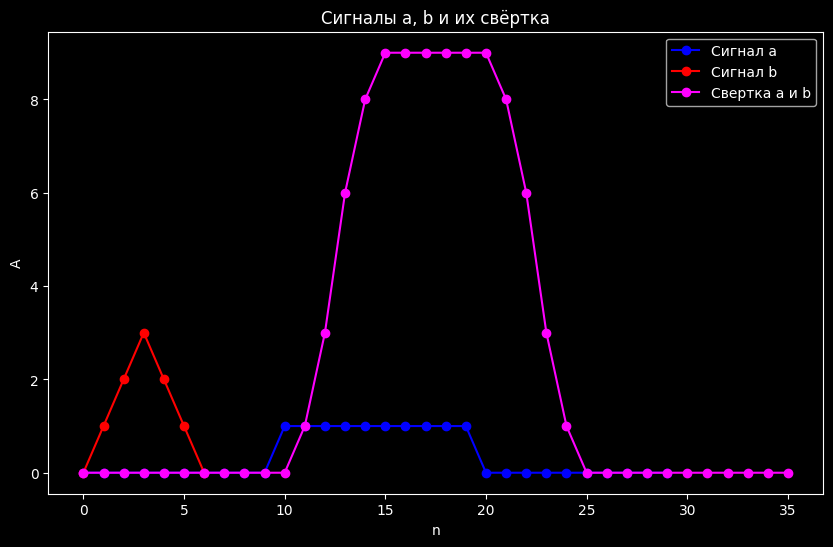

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(a, marker='o', linestyle='-', color='b', label='Сигнал a')
plt.plot(b, marker='o', linestyle='-', color='r', label='Сигнал b')
plt.plot(res, marker='o', linestyle='-', color='#FF00FF', label='Свертка a и b')

plt.title('Сигналы a, b и их свёртка')
plt.xlabel('n')
plt.ylabel('А')
plt.legend()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат.

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [33]:
def karplus_strong(noise, N):
    y = np.zeros(N)
    y[:len(noise)] = noise

    for n in range(len(noise), N):
        y[n] = 0.5 * (y[n - len(noise)] + y[n - len(noise) - 1])

    return y

In [35]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [57]:
sample_rate = 44100  # Частота дискретизации
frequencies = [82.41, 110, 146.83]  # Частоты для нот (E2, A2, D3)
sec = 5  # Длительность каждой ноты в секундах
gen_len = sample_rate * sec  # Длина генерируемого сигнала

# Генерация звукового сигнала для каждой ноты
generated_signals = {}

for freq in frequencies:
    # Генерация начального шума
    noise = (2 * np.random.uniform(-1, 1, int(sample_rate / freq)))  # [-1, 1]

    # Генерация звукового сигнала с помощью Karplus-Strong
    gen_wav = karplus_strong(noise, gen_len)

    # Сохранение сгенерированного сигнала в WAV файл
    sf.write(f'guitar_note_{freq}.wav', gen_wav, sample_rate)

In [58]:
from IPython.display import Audio
for freq in frequencies:
    print(f'Воспроизводится нота: {freq} Гц')
    display(Audio(f'guitar_note_{freq}.wav'))

Воспроизводится нота: 82.41 Гц


Воспроизводится нота: 110 Гц


Воспроизводится нота: 146.83 Гц


Визуализируем затухание амплитуды:

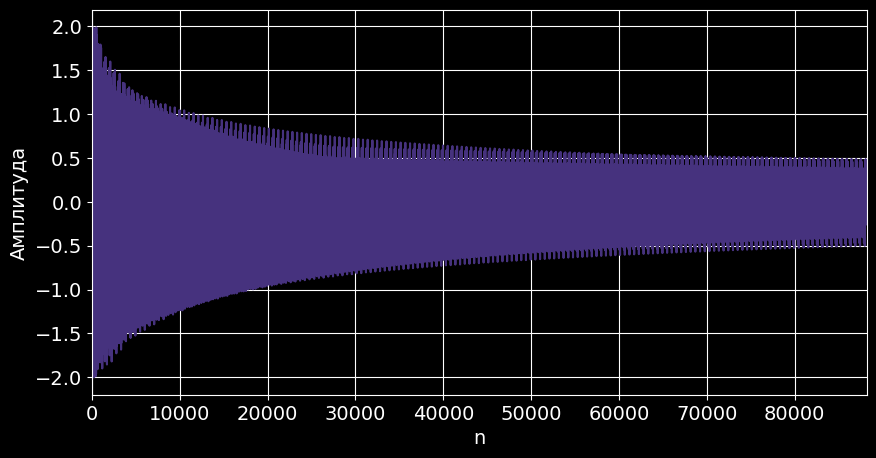

In [49]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

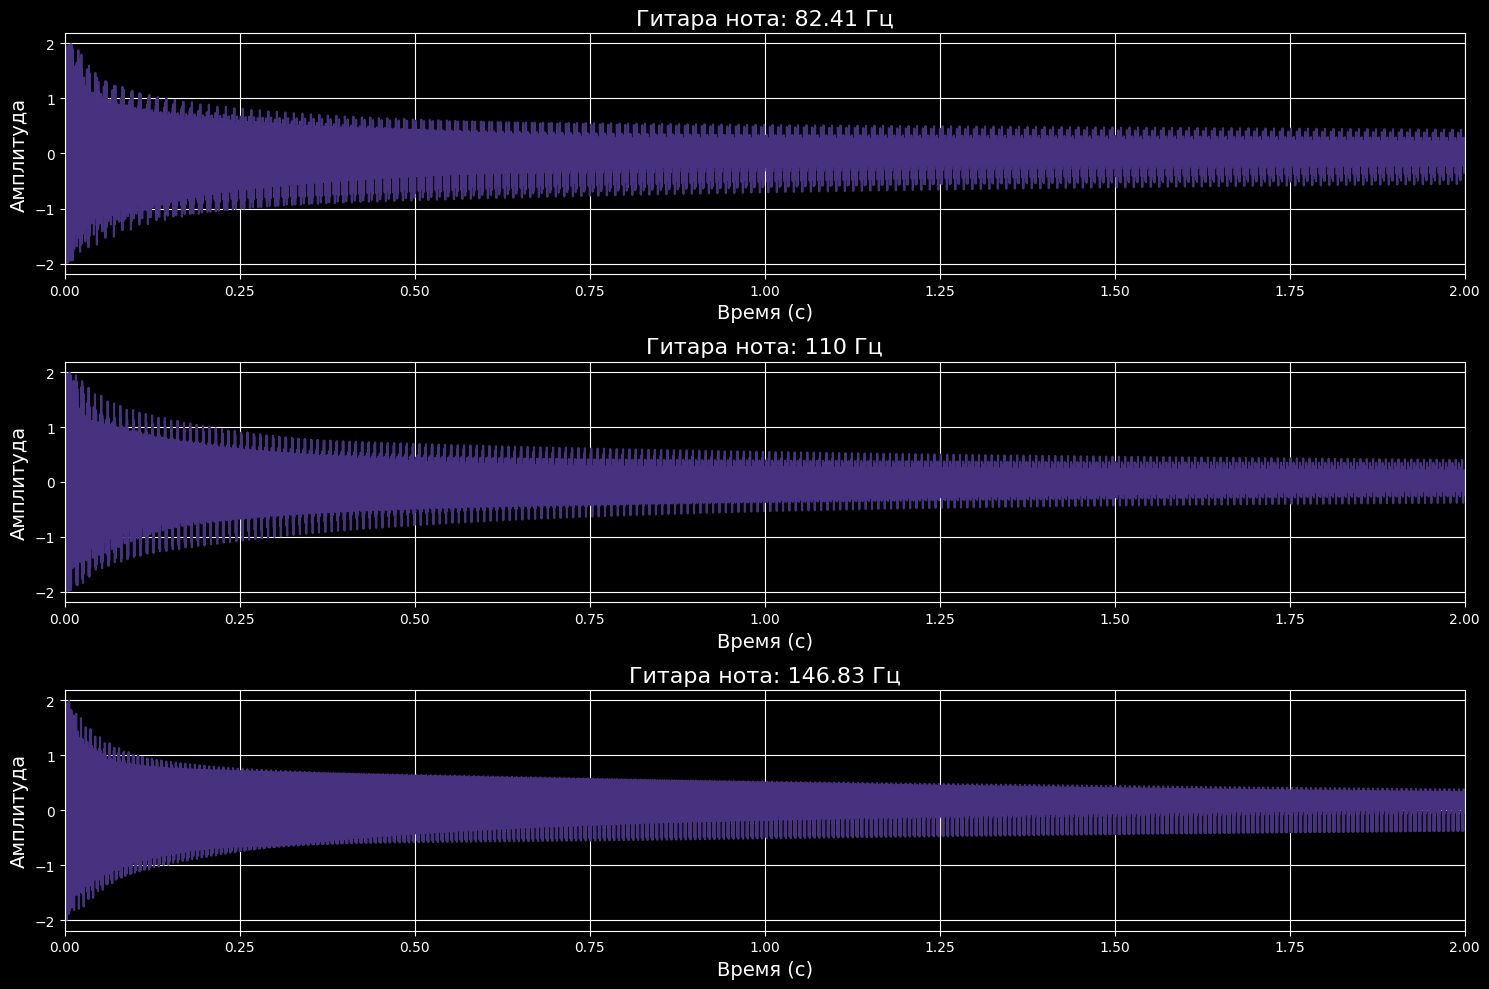

In [51]:
import matplotlib.pyplot as plt

# Визуализация сигналов
plt.figure(figsize=(15, 10))

for i, (freq, signal) in enumerate(generated_signals.items()):
    plt.subplot(len(generated_signals), 1, i + 1)
    plt.plot(np.linspace(0, sec, gen_len), signal)
    plt.title(f'Гитара нота: {freq} Гц', fontsize=16)
    plt.xlabel('Время (с)', fontsize=14)
    plt.ylabel('Амплитуда', fontsize=14)
    plt.xlim(0, sec)
    plt.grid()

plt.tight_layout()
plt.show()